# Debugging for dataset
## script
    - Make sure the dataset script is in `vos/dataset/`
    - And this notebook is working on `COCO.py`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from vos.datasets.COCO import COCO

In [2]:
root = "/p300/videoObjSeg_dataset/COCO-2017-train"
cocod = COCO(root, mode= "train", max_n_objects= 8)

print(len(cocod))
data = cocod[0]
for k, v in data.items():
    print(k, v.shape)

loading annotations into memory...
Done (t=25.64s)
creating index...
index created!
118287
image torch.Size([3, 360, 640])
mask torch.Size([9, 360, 640])
n_objects torch.Size([])


In [ ]:
image = data["image"].numpy().transpose(1,2,0)
mask = data["mask"].numpy().transpose(1,2,0)

print(data["n_objects"], mask.shape)
no = data["n_objects"]
H, W, N = mask.shape
plt.imshow(image)

In [ ]:
fig = plt.figure()
for i in range(no+1):
    a = fig.add_subplot(1, no+1, i+1)
    plt.imshow(mask[:,:,i], cmap= "gray")
    plt.axis("off")

## Bug confirmed:
    Wrong masked in channel whose idx is greater than 1

In [3]:
import skimage.io as io

(375, 500) <class 'list'>


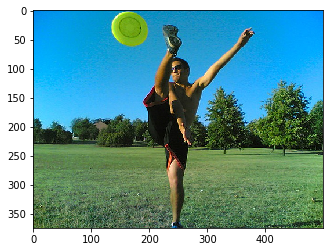

In [33]:
idx = np.random.choice(len(cocod), 1)[0]

img = cocod.coco.loadImgs(cocod.imgIds[idx])[0]
# This image is in (H, W, C) shape
image = io.imread('%s/images/%s'%(
    cocod._root,
    img['file_name']
)).astype(np.float32) / 255

annIds = cocod.coco.getAnnIds(imgIds= img["id"])
anns = cocod.coco.loadAnns(annIds)

anns.sort(key= lambda x: x["area"], reverse= True)

ann = anns[0]
ann_mask = cocod.coco.annToMask(ann)
H, W = ann_mask.shape
print(ann_mask.shape, type(anns))
plt.imshow(image)

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])
area: 18036.168999999998
area fraction: 0.032064300444444443


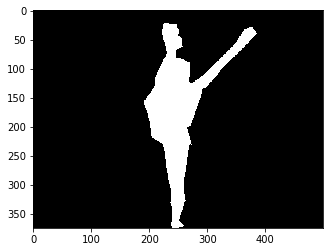

In [34]:
print(ann.keys())
print("area: {}".format(ann["area"]))
print("area fraction: {}".format(ann["area"] / np.prod(image.shape)))
plt.imshow(ann_mask, cmap= "gray")

False


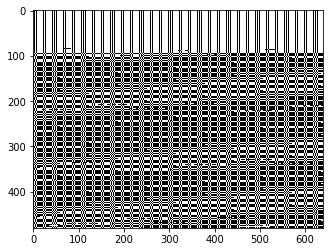

In [24]:
mask = np.empty((H, W, 1), dtype= np.uint8)
print((mask == 0).all())
mask[:, :, 0] |= ann_mask
plt.imshow(mask[:,:,0], cmap= "gray")

True


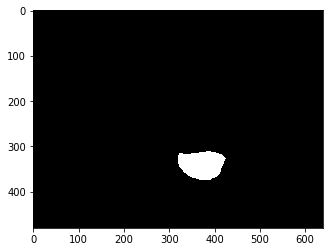

In [25]:
mask = np.zeros((H, W, 1), dtype= np.uint8)
print((mask == 0).all())
mask[:, :, 0] |= ann_mask
plt.imshow(mask[:,:,0], cmap= "gray")